In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test2.csv')

## Cinsiyet ve Binilen Yerleri Sayısal Veriye Çevirme

In [6]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [7]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [8]:
train.drop(['Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [9]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
train_values = {'Age': round(np.mean(train['Age']))}
train = train.fillna(value = train_values)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [11]:
train_values = {'Embarked': round(np.mean(train['Embarked']))}
train = train.fillna(value = train_values)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [12]:
test.drop(['Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [13]:
#test.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [14]:
test_values = {'Age':round(np.mean(test['Age'])), 'Fare':round(np.mean(test['Fare']))}
test = test.fillna(value = test_values)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [15]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [16]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0.0
887,1,1,19.0,0,0,30.0000,0.0
888,3,1,30.0,1,2,23.4500,0.0
889,1,0,26.0,0,0,30.0000,1.0


In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [19]:
print("X_train boyutu: {}".format(len(X_train)))
print("y_train boyutu: {}".format(len(y_train)))
print("\n")
print("X_test boyutu: {}".format(len(X_test)))
print("y_test boyutu: {}".format(len(y_test)))
print("\n")
print("Oran: {:.0%}".format(len(X_train)/(len(X_train)+len(X_test))))

X_train boyutu: 668
y_train boyutu: 668


X_test boyutu: 223
y_test boyutu: 223


Oran: 75%


In [20]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
431,3,1,30.0,1,0,16.1000,0.0
821,3,0,27.0,0,0,8.6625,0.0
629,3,0,30.0,0,0,7.7333,2.0
626,2,0,57.0,0,0,12.3500,2.0
665,2,0,32.0,2,0,73.5000,0.0
...,...,...,...,...,...,...,...
158,3,0,30.0,0,0,8.6625,0.0
397,2,0,46.0,0,0,26.0000,0.0
494,3,0,21.0,0,0,8.0500,0.0
696,3,0,44.0,0,0,8.0500,0.0


In [21]:
y_test

431    1
821    1
629    0
626    0
665    0
      ..
158    0
397    0
494    0
696    0
616    0
Name: Survived, Length: 223, dtype: int64

In [22]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
731,3,0,11.0,0,0,18.7875,1.0
820,1,1,52.0,1,1,93.5000,0.0
272,2,1,41.0,0,1,19.5000,0.0
420,3,0,30.0,0,0,7.8958,1.0
214,3,0,30.0,1,0,7.7500,2.0
...,...,...,...,...,...,...,...
269,1,1,35.0,0,0,135.6333,0.0
337,1,1,41.0,0,0,134.5000,1.0
91,3,0,20.0,0,0,7.8542,0.0
80,3,0,22.0,0,0,9.0000,0.0


In [23]:
y_train

731    0
820    1
272    1
420    0
214    0
      ..
269    1
337    1
91     0
80     0
703    0
Name: Survived, Length: 668, dtype: int64

# Logistic Regression

In [24]:
logmodel = LogisticRegression(solver = 'liblinear')

In [25]:
logmodel.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [26]:
LRTahmin = logmodel.predict(X_test)


In [27]:
print(classification_report(y_test, LRTahmin))


              precision    recall  f1-score   support

           0       0.87      0.92      0.89       147
           1       0.82      0.74      0.78        76

    accuracy                           0.86       223
   macro avg       0.85      0.83      0.84       223
weighted avg       0.85      0.86      0.85       223



In [28]:
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Tahmin")
  plt.ylabel("Gerçek Değer")
  plt.title("Karışıklık Matrisi")
  return sns

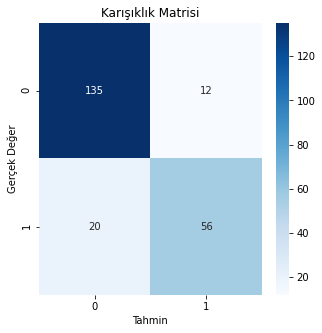

In [29]:
plot_confusion(confusion_matrix(y_test, LRTahmin));

# Random Forest

In [30]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RFCTahmin = random_forest.predict(X_test)


In [31]:
print(classification_report(y_test, RFCTahmin))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       147
           1       0.78      0.71      0.74        76

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



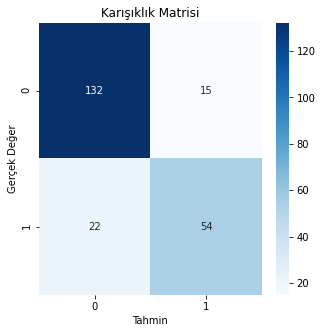

In [32]:
plot_confusion(confusion_matrix(y_test, RFCTahmin));

In [33]:
test_tahmin = logmodel.predict(test)

In [34]:
test_tahmin

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [185]:
sub_file = pd.read_csv('gender_submission.csv')
sub_file['Survived'] = test_tahmin
sub_file.to_csv('sub.csv',index=False)